In [45]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [46]:
df = df[df['job_title_short']=='Data Engineer']
df_exploded = df.explode('job_skills')

In [47]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(10)
skill_stats

,skill_count,median_salary
job_skills,,
sql,113130,125000.0
python,108022,125000.0
aws,62049,130000.0
azure,60674,125000.0
spark,53656,134775.0
java,35559,134241.0
kafka,29073,140000.0
hadoop,28815,134241.0
scala,28716,137500.0


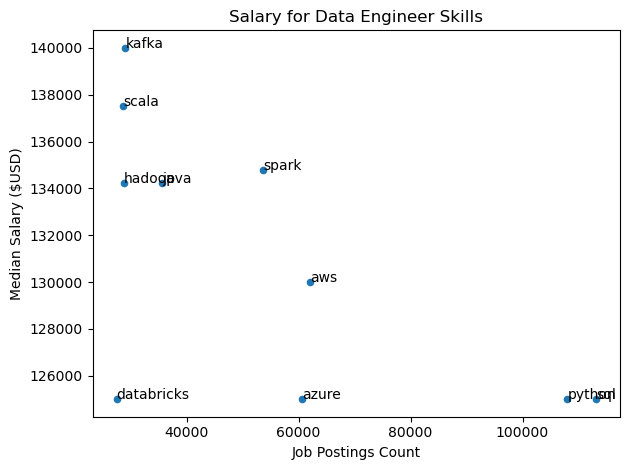

In [49]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Job Postings Count')
plt.ylabel('Median Salary ($USD)')
plt.title('Salary for Data Engineer Skills')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)

plt.tight_layout()
plt.show()